# Generating $pKa$ estimates from propka using a molecular dynamics trajectory

In [1]:
import MDAnalysis as mda
from MDAnalysisTests.datafiles import PSF, DCD

/home/bioc1523/software/anaconda/install/envs/propkatraj-3.1/lib/python3.8/site-packages/MDAnalysisTests/__init__.py:126: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


For demo purposes we'll use a topology and trajectory used in the [MDAnalysis](http://mdanalysis.org) test suite to make a `Universe`:

In [2]:
u = mda.Universe(PSF, DCD)

This `Universe` contains a trajectory of an adenylate kinase protein with 3341 atoms, 214 residues.

In [3]:
print("number of atoms: ", len(u.atoms))
print("number of residues:", len(u.residues))
print("unique residues:", set(u.residues.resnames))

number of atoms:  3341
number of residues: 214
unique residues: {'ASP', 'ARG', 'VAL', 'GLN', 'GLY', 'CYS', 'PRO', 'SER', 'THR', 'HSD', 'GLU', 'ALA', 'LYS', 'TYR', 'MET', 'LEU', 'PHE', 'ASN', 'ILE'}


We want to use the class `propkatraj.PropkaTraj`, so we need to import `propkatraj`:

In [4]:
import propkatraj

We can call the `help()` method to get information on how to use `PropkaTraj`. This includes information on; what parameters can be passed to the class, example uses, known bugs, and limitations.

In [5]:
help(propkatraj.PropkaTraj)

Help on class PropkaTraj in module propkatraj.propkatraj:

class PropkaTraj(MDAnalysis.analysis.base.AnalysisBase)
 |  PropkaTraj(atomgroup, select='protein', skip_failure=False, **kwargs)
 |  
 |  Per residue pKa analysis of a trajectory.
 |  
 |  Runs :program:`propka` on the titrateable residues of the selected
 |  AtomGroup on each frame in the trajectory. Run the analysis with
 |  :meth:`PropkaTraj.run`, and pKa values will be stored in a
 |  :class:`pandas.DataFrame` named :attr:`PropkaTraj.pkas`.
 |  
 |  Parameters
 |  ----------
 |  atomgroup : :class:`MDAnalysis.Universe` or :class:`MDAnalysis.AtomGroup`
 |      Group of atoms containing the residues for pKa analysis. Please note
 |      that :class:`MDAnalysis.UpdatingAtomGroup` are not supported and will
 |      be automatically converted to :class:`MDAnalysis.AtomGroup`.
 |  select : str
 |      Selection string to use for selecting a subsection of atoms to use
 |      from the input ``atomgroup``. Note: passing non-protei

We create a class instance `pkatraj` from `PropkaTraj` by passing the Universe `u`.

In [6]:
pkatraj = propkatraj.PropkaTraj(u)

We then need to call the `run()` method to calculate the pKas. It is worth noting that run can take optional arguments; verbose, start, stop, and step. The latter three control what frames are analysed. See https://www.mdanalysis.org/docs/documentation_pages/analysis/base.html for more details.

In [7]:
pkatraj.run()

/home/bioc1523/software/anaconda/install/envs/propkatraj-3.1/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/bioc1523/software/anaconda/install/envs/propkatraj-3.1/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/bioc1523/software/anaconda/install/envs/propkatraj-3.1/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/bioc1523/software/anaconda/install/envs/propkatraj-3.1/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:1026: UserWarning: Found no information for attr: 'tempfactors' Using default value of '0.0'
  w

Once run, the timeseries of calculated pKas for the titrateable residue is stored in a pandas Dataframe (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) under the attribute `pkas`.

In [8]:
pkatraj.pkas

,1,2,13,22,23,24,33,36,40,44,...,192,193,195,197,200,204,206,208,210,211
time,,,,,,,,,,,,,,,,,,,,,
1.000000,7.463827,12.394323,8.344347,4.090509,11.542252,11.014674,2.364393,14.056423,10.092552,3.505057,...,11.181185,13.954125,12.392177,2.179990,12.578384,3.817193,14.744087,1.736156,2.083698,11.366898
2.000000,7.295912,13.246053,8.292964,3.854538,11.335496,11.264583,2.638269,13.262729,10.088877,3.794538,...,11.221025,13.739182,12.308242,2.276176,12.686712,3.638481,15.098640,1.747098,2.081976,11.334325
3.000000,7.446632,13.206571,7.998785,4.045926,11.002587,11.863192,2.235340,13.454440,10.065400,3.569236,...,11.217360,13.806216,12.258947,2.343485,12.692147,2.838206,14.823071,1.801874,2.187098,12.052625
4.000000,7.364847,12.870917,7.608654,3.205508,11.649248,11.196828,1.891175,13.443144,10.079494,3.280471,...,11.272248,14.030501,12.313860,2.576164,12.626028,3.056464,15.060797,1.706005,2.709781,12.031399
5.000000,8.431659,12.497731,8.108605,3.366329,11.438484,11.422239,2.458851,13.348897,10.050490,3.805812,...,11.202101,13.930253,12.187661,2.475596,12.687261,2.804341,14.958428,1.825790,2.589898,12.055694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93.999992,8.227663,12.859320,9.685207,3.288962,11.160589,10.748242,2.199330,13.464198,10.415339,3.170045,...,9.880471,13.949351,11.992260,2.222933,12.586705,2.850050,14.934541,1.907153,2.651611,12.088406
94.999992,8.186176,12.757756,9.513816,3.238071,11.190640,12.769068,2.529363,13.107833,10.406756,2.799962,...,10.121907,14.081723,11.870259,1.986225,12.608072,2.871361,14.891981,1.832945,2.814808,12.156833
95.999992,8.238244,12.466026,9.666167,3.109490,11.158498,10.730249,2.559985,13.364670,10.399769,3.161105,...,9.794297,14.102544,11.972831,2.111825,12.587400,2.832126,15.088504,1.840302,2.677849,12.124620


You can get a description of the statistics of the pKa values by calling the DataFrame's `describe()` method.

In [9]:
pkatraj.pkas.describe()

,1,2,13,22,23,24,33,36,40,44,...,192,193,195,197,200,204,206,208,210,211
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,8.180723,12.760635,9.402281,3.488394,11.418135,11.642697,2.496964,14.049793,10.348338,3.734205,...,10.754325,14.010479,12.066464,2.110729,12.593243,2.899029,14.802081,1.901808,2.643797,12.076064
std,0.190336,0.159992,0.627494,0.303016,0.355354,0.864402,0.418080,0.506324,0.129717,0.261796,...,0.589032,0.259118,0.142012,0.325367,0.046812,0.147478,0.420351,0.121053,0.331960,0.120737
min,7.295912,12.268418,7.608654,2.947118,10.985647,10.264614,1.412159,12.838007,9.960275,2.799962,...,9.661010,13.174104,11.733061,1.249881,12.442245,2.767964,13.814350,1.528530,1.861115,11.334325
25%,8.127513,12.703356,9.423932,3.240923,11.152677,10.915393,2.234819,13.556806,10.252726,3.625440,...,10.111005,13.878456,11.970498,1.980458,12.566704,2.839813,14.535355,1.836325,2.591431,12.055367
50%,8.201208,12.762834,9.544703,3.395460,11.221198,11.460753,2.430872,14.136217,10.410696,3.835666,...,11.209223,14.035418,12.066676,2.177655,12.587065,2.861878,14.795689,1.888335,2.754017,12.089534
75%,8.273955,12.849670,9.710506,3.718057,11.620171,12.428121,2.682613,14.404762,10.430810,3.918784,...,11.260263,14.164137,12.191065,2.293660,12.621373,2.895128,15.024791,1.968771,2.852710,12.133085
max,8.458619,13.246053,10.449350,4.278064,12.282208,13.113857,3.608263,15.182562,10.460633,4.010099,...,11.331529,14.472733,12.392177,3.000020,12.692147,3.817193,15.909253,2.200353,3.381706,12.207916


Next, let's plot these values. Note; this uses the matplotlib and seaborn packages that are not installed by default when installing propkatraj.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

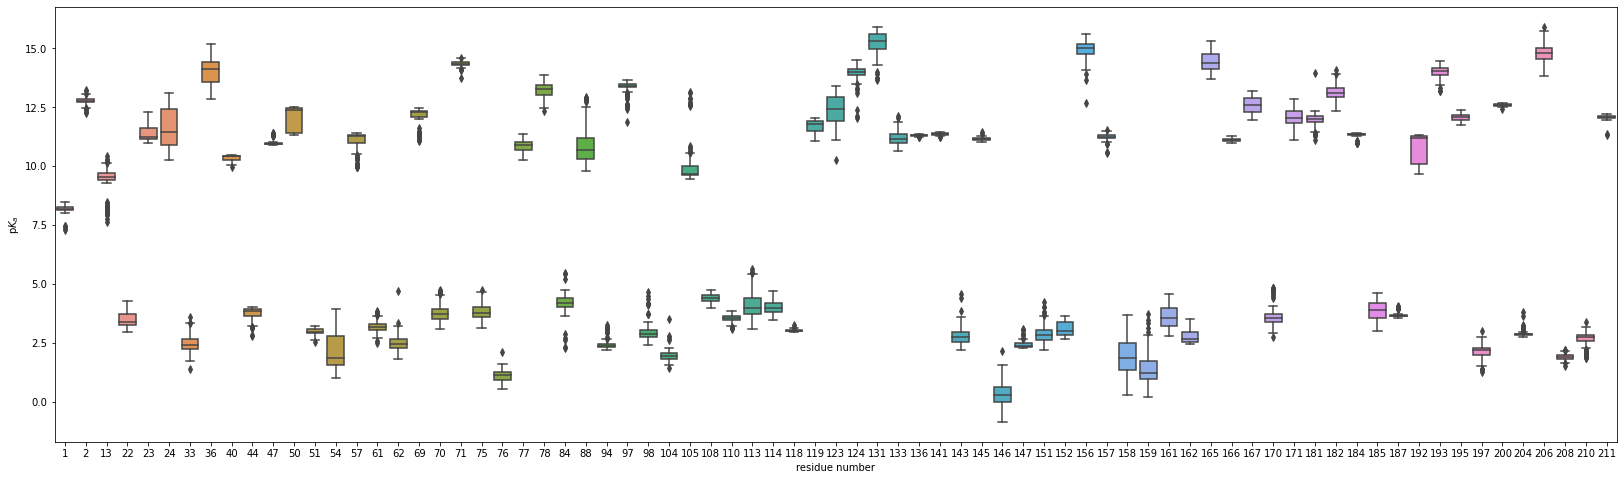

In [11]:
fig = plt.figure(figsize=(28, 8))
ax = fig.add_subplot(1,1,1)
sns.boxplot(data=pkatraj.pkas, ax=ax)
ax.set_xlabel("residue number")
ax.set_ylabel(r"p$K_a$");

What if we only want to look at the protein's lysines?

In [12]:
resids = u.select_atoms('resname LYS').residues.resids

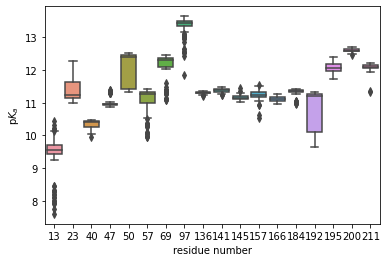

In [13]:
sns.boxplot(data=pkatraj.pkas[resids])
ax = plt.gca()
ax.set_xlabel("residue number")
ax.set_ylabel(r"p$K_a$");

You can use this strategy to look at any residues of interest.